# Project 1

## Data Acquisition

The dataset used was taken from kaggle with the following attributes:
* Body Type*
* Sex
* Diet*
* Frequency of Showering*
* Residential Heating Energy
* Transportation Preference
* Vehicle Type
* Social Activity*
* Monthly Grocery Bill
* Frequency of Traveling by Air
* Vehicle Monthly Distance km
* Waste Bag Size*
* Waste Bag Weekly Count*
* How Long TV PC Daily Hour
* How Many New Clothes Monthly*
* How Long Internet Daily Hour*
* Energy Efficiency
* Recycling*
* Cooking _With*
* CarbonEmission

*Columns were not used in this project
The dataset used can be accessed used the following link: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import scipy.stats as st

In [ ]:
# Mount drive

drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
# Read data from the file to a dataframe

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Carbon Emission.csv')

# Extracting the cloumns to be used
df = df[["Sex","Heating Energy Source","Transport","Vehicle Type","Monthly Grocery Bill","Frequency of Traveling by Air","Vehicle Monthly Distance Km","How Long TV PC Daily Hour","Energy efficiency","CarbonEmission"]]
df

,Sex,Heating Energy Source,Transport,Vehicle Type,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,How Long TV PC Daily Hour,Energy efficiency,CarbonEmission
0,female,coal,public,NaN,230,frequently,210,7,No,2238
1,female,natural gas,walk/bicycle,NaN,114,rarely,9,9,No,1892
2,male,wood,private,petrol,138,never,2472,14,Sometimes,2595
3,male,wood,walk/bicycle,NaN,157,rarely,74,20,Sometimes,1074
4,female,coal,private,diesel,266,very frequently,8457,3,Yes,4743
...,...,...,...,...,...,...,...,...,...,...
9995,male,coal,private,hybrid,230,never,268,12,Yes,2408
9996,female,coal,private,lpg,234,frequently,5316,14,Sometimes,3084
9997,female,electricity,walk/bicycle,NaN,298,very frequently,96,11,Yes,2377
9998,male,coal,private,petrol,179,rarely,8688,19,Sometimes,4574


## Data Exploration

### Descriptive Statistics

In [107]:
# Central Tendencies
avg = df.mean()
print("Average Values\n",avg)

mde = df.mode()
print("\n\nModal Values\n",mde)

mdn = df.median()
print("\n\nMedian Values\n",mdn)

# Data Dispersion
mini = df.min()
print("\n\nMinimum Values\n",mini)

maxi = df.max()
print("\n\nMaximum Values\n",maxi)

stdvn = df.std()
print("\n\nStandard Deviation Values\n",stdvn)

vrnce = df.var()
print("\n\nVariance Values\n", vrnce)

<ipython-input-107-fa8440a71ae7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = df.mean()
<ipython-input-107-fa8440a71ae7>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdn = df.median()
<ipython-input-107-fa8440a71ae7>:12: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mini = df.min()


Average Values
 Monthly Grocery Bill            173.8752
Vehicle Monthly Distance Km    2031.4859
How Long TV PC Daily Hour        12.1392
CarbonEmission                 2269.1473
dtype: float64


Modal Values
       Sex Heating Energy Source     Transport Vehicle Type  \
0  female           electricity  walk/bicycle          lpg   
1     NaN                   NaN           NaN          NaN   

   Monthly Grocery Bill Frequency of Traveling by Air  \
0                   118               very frequently   
1                   158                           NaN   

   Vehicle Monthly Distance Km  How Long TV PC Daily Hour Energy efficiency  \
0                         92.0                       11.0         Sometimes   
1                          NaN                        NaN               NaN   

   CarbonEmission  
0          1674.0  
1             NaN  


Median Values
 Monthly Grocery Bill            173.0
Vehicle Monthly Distance Km     823.0
How Long TV PC Daily Hour        12.0
C

<ipython-input-107-fa8440a71ae7>:15: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  maxi = df.max()
<ipython-input-107-fa8440a71ae7>:18: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdvn = df.std()
<ipython-input-107-fa8440a71ae7>:21: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vrnce = df.var()


### Correlation Analysis

In [108]:
# Correlation Analysis between CarbonEmission and Monthly Grocery Bill
gbilcor = df['CarbonEmission'].corr(df['Monthly Grocery Bill'])
print("Correlation between Carbon Emission and Monthly Grocery Bill: ", gbilcor)

# Correlation Analysis between CarbonEmission and Vehicle Monthly Distance Km
vdiscorr = df['CarbonEmission'].corr(df['Vehicle Monthly Distance Km'])
print("Correlation between Carbon Emission and Vehicle Monthly Distance: ", vdiscorr)

# Correlation Analysis between CarbonEmission and How Long TV PC Daily Hour
tvcorr = df['CarbonEmission'].corr(df['How Long TV PC Daily Hour'])
print("Correlation between Carbon Emission and TV/PC Daily Hour: ", tvcorr)

Correlation between Carbon Emission and Monthly Grocery Bill:  0.08158658163208109
Correlation between Carbon Emission and Vehicle Monthly Distance:  0.5941712950028849
Correlation between Carbon Emission and TV/PC Daily Hour:  0.012984998195220577


### Scatter Plots

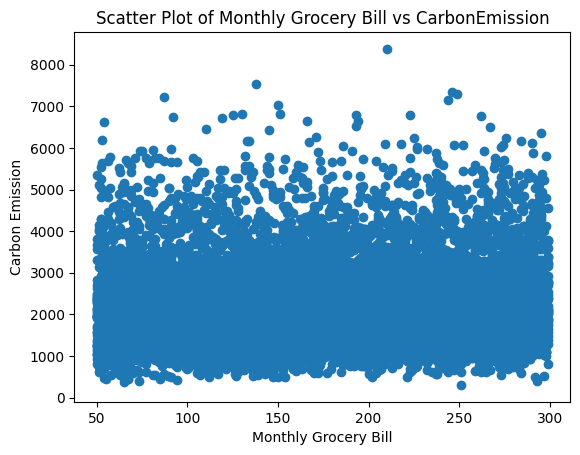

In [109]:
# Scatter Plot of CarbonEmission vs Monthly Grocery Bill
plt.scatter(df['Monthly Grocery Bill'], df['CarbonEmission'])
plt.title("Scatter Plot of Monthly Grocery Bill vs CarbonEmission")
plt.xlabel("Monthly Grocery Bill")
plt.ylabel("Carbon Emission")
plt.show()

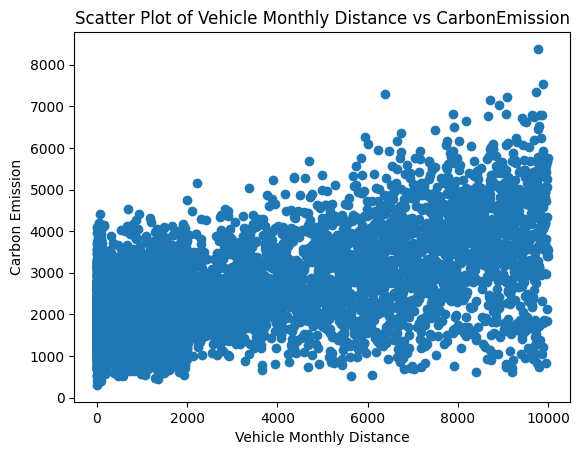

In [110]:
plt.scatter(df['Vehicle Monthly Distance Km'], df['CarbonEmission'])
plt.title("Scatter Plot of Vehicle Monthly Distance vs CarbonEmission")
plt.xlabel("Vehicle Monthly Distance")
plt.ylabel("Carbon Emission")
plt.show()

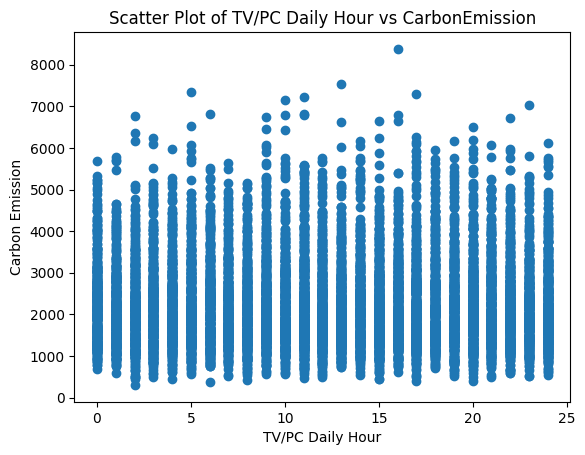

In [111]:
plt.scatter(df['How Long TV PC Daily Hour'], df['CarbonEmission'])
plt.title("Scatter Plot of TV/PC Daily Hour vs CarbonEmission")
plt.xlabel("TV/PC Daily Hour")
plt.ylabel("Carbon Emission")
plt.show()

### Distibution of Categorial Variables

#### Frequency of Categorical Variables

In [112]:
# Frequency of each Sex
print("Frequency of Each Sex")
print(df['Sex'].value_counts())

# Frequency of each heating energy source
print("\nFrequency of Each Heating Energy Source")
print(df["Heating Energy Source"].value_counts())

# Frequency of preferred mode of transportation
print("\nFrequency of Preferred Mode of Transportation")
print(df['Transport'].value_counts())

# Frequency of each vehicle type
print("\nFrequency of Each Vehicle Type")
print(df['Vehicle Type'].value_counts())

# Frequency of travel by plane behaviour
print("\nFrequency of Travel by Plane Behaviour")
print(df['Frequency of Traveling by Air'].value_counts())

# Frequency of each level of energy efficiency
print("\nFrequency of Each Level of Energy Efficiency")
print(df['Energy efficiency'].value_counts())

Frequency of Each Sex
female    5007
male      4993
Name: Sex, dtype: int64

Frequency of Each Heating Energy Source
electricity    2552
coal           2523
wood           2463
natural gas    2462
Name: Heating Energy Source, dtype: int64

Frequency of Preferred Mode of Transportation
walk/bicycle    3427
public          3294
private         3279
Name: Transport, dtype: int64

Frequency of Each Vehicle Type
lpg         697
electric    671
petrol      647
hybrid      642
diesel      622
Name: Vehicle Type, dtype: int64

Frequency of Travel by Plane Behaviour
very frequently    2540
frequently         2524
rarely             2477
never              2459
Name: Frequency of Traveling by Air, dtype: int64

Frequency of Each Level of Energy Efficiency
Sometimes    3463
Yes          3316
No           3221
Name: Energy efficiency, dtype: int64


The frequency of the values in the Vehicle Type column sum to 3,279 out of 10,000 entries. From the display of the dataframe after selecting the columns to be used we can see that there are null values within the column. The null value can be as a result of individuals not owning a vehicle. With this in mind simply dropping the rows with null values would not be the preffered way of handling the null values.

#### Distribution of Carbon Emission over Categorical Variables

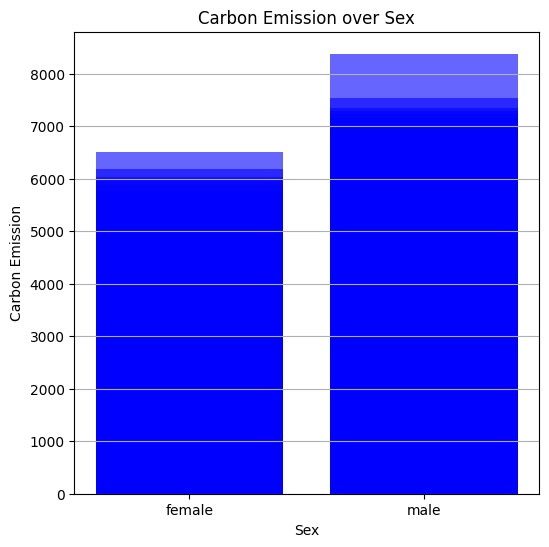

In [113]:
# Distribution of Carbon Emission Over Sex
plt.figure(figsize=(6,6))
plt.bar(df['Sex'],df['CarbonEmission'],color='blue',alpha=0.6)
plt.title("Carbon Emission over Sex")
plt.xlabel("Sex")
plt.ylabel("Carbon Emission")
plt.grid(axis='y')
plt.show()

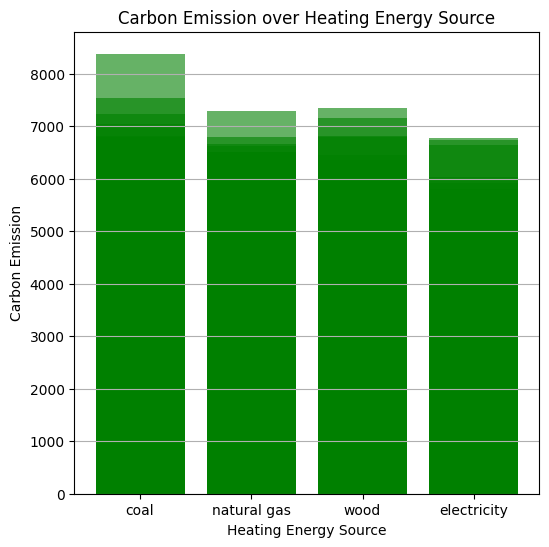

In [114]:
# Distribution of Carbon Emission Over Heating Energy Source
plt.figure(figsize=(6,6))
plt.bar(df['Heating Energy Source'],df['CarbonEmission'],color='green',alpha=0.6)
plt.title("Carbon Emission over Heating Energy Source")
plt.xlabel("Heating Energy Source")
plt.ylabel("Carbon Emission")
plt.grid(axis='y')
plt.show()

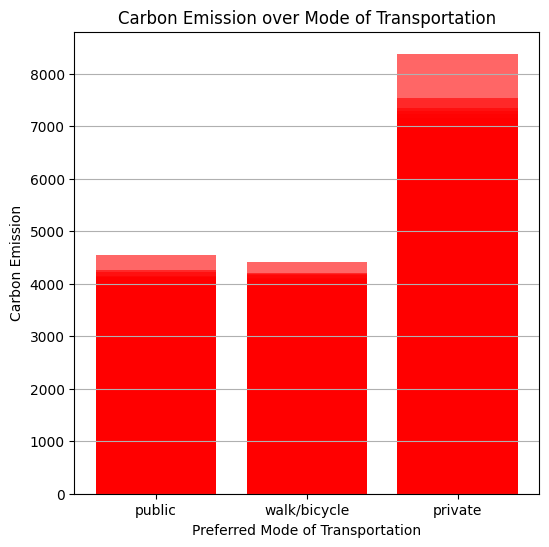

In [115]:
# Distribution of Carbon Emission Over Preferred Mode of Transportation
plt.figure(figsize=(6,6))
plt.bar(df['Transport'],df['CarbonEmission'],color='red',alpha=0.6)
plt.title("Carbon Emission over Mode of Transportation")
plt.xlabel("Preferred Mode of Transportation")
plt.ylabel("Carbon Emission")
plt.grid(axis='y')
plt.show()

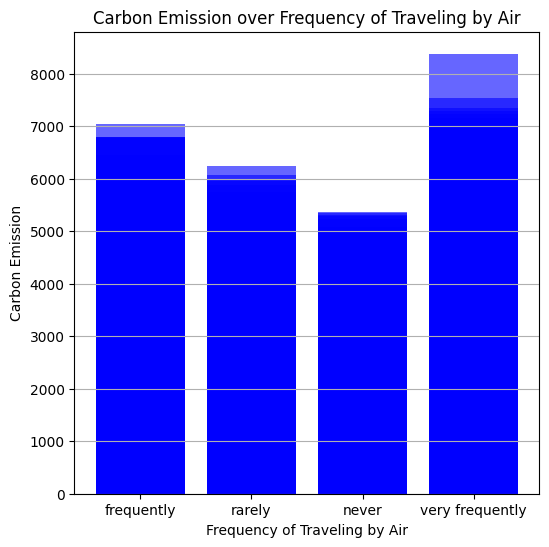

In [116]:
# Distribution of Carbon Emission Over Frequency of Traveling by Air
plt.figure(figsize=(6,6))
plt.bar(df['Frequency of Traveling by Air'],df['CarbonEmission'],color='blue',alpha=0.6)
plt.title("Carbon Emission over Frequency of Traveling by Air")
plt.xlabel("Frequency of Traveling by Air")
plt.ylabel("Carbon Emission")
plt.grid(axis='y')
plt.show()

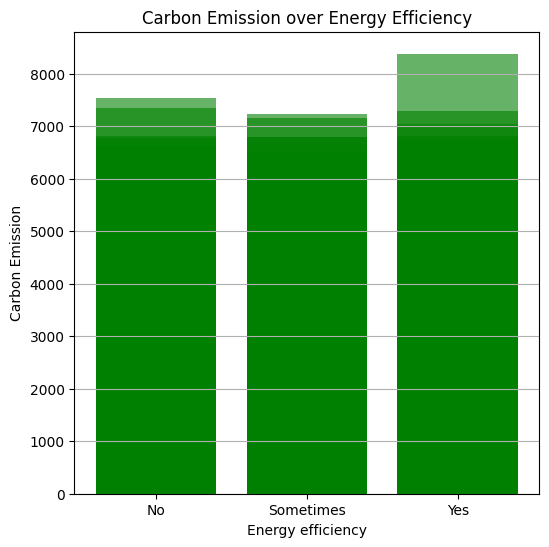

In [117]:
# Distribution of Carbon Emission Over Energy efficiency
plt.figure(figsize=(6,6))
plt.bar(df['Energy efficiency'],df['CarbonEmission'],color='green',alpha=0.6)
plt.title("Carbon Emission over Energy Efficiency")
plt.xlabel("Energy efficiency")
plt.ylabel("Carbon Emission")
plt.grid(axis='y')
plt.show()

## Data Processing

Assumning a null value in the column Vehicle Type implies an individual does not own a vehicle, filling such entries with "Not Applicable" would be a useful way to handle null values.

In [118]:
# Handling missing values
df = df.fillna("Not Applicable")
df

,Sex,Heating Energy Source,Transport,Vehicle Type,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,How Long TV PC Daily Hour,Energy efficiency,CarbonEmission
0,female,coal,public,Not Applicable,230,frequently,210,7,No,2238
1,female,natural gas,walk/bicycle,Not Applicable,114,rarely,9,9,No,1892
2,male,wood,private,petrol,138,never,2472,14,Sometimes,2595
3,male,wood,walk/bicycle,Not Applicable,157,rarely,74,20,Sometimes,1074
4,female,coal,private,diesel,266,very frequently,8457,3,Yes,4743
...,...,...,...,...,...,...,...,...,...,...
9995,male,coal,private,hybrid,230,never,268,12,Yes,2408
9996,female,coal,private,lpg,234,frequently,5316,14,Sometimes,3084
9997,female,electricity,walk/bicycle,Not Applicable,298,very frequently,96,11,Yes,2377
9998,male,coal,private,petrol,179,rarely,8688,19,Sometimes,4574


In [119]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df,columns=['Sex','Heating Energy Source','Transport','Vehicle Type','Frequency of Traveling by Air','Energy efficiency'])
df_encoded

,Monthly Grocery Bill,Vehicle Monthly Distance Km,How Long TV PC Daily Hour,CarbonEmission,Sex_female,Sex_male,Heating Energy Source_coal,Heating Energy Source_electricity,Heating Energy Source_natural gas,Heating Energy Source_wood,...,Vehicle Type_hybrid,Vehicle Type_lpg,Vehicle Type_petrol,Frequency of Traveling by Air_frequently,Frequency of Traveling by Air_never,Frequency of Traveling by Air_rarely,Frequency of Traveling by Air_very frequently,Energy efficiency_No,Energy efficiency_Sometimes,Energy efficiency_Yes
0,230,210,7,2238,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,114,9,9,1892,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,138,2472,14,2595,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,157,74,20,1074,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,266,8457,3,4743,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,230,268,12,2408,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9996,234,5316,14,3084,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9997,298,96,11,2377,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9998,179,8688,19,4574,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## Statistical Analysis

### T-tests between Numerical Variables

In [120]:
# paired t-test between numerical variables
t_stat, pval = ttest_rel(df['CarbonEmission'],df['How Long TV PC Daily Hour'])

print("T-statistic: ",t_stat)
print("P-value: ",pval)

T-statistic:  221.7954839488119
P-value:  0.0


Given the low p-value implies there is some correlation between Carbon Emission and the hours spent each day on a TV or PC.

In [121]:
t_stat2, pval2 = ttest_rel(df['CarbonEmission'],df['Monthly Grocery Bill'])

print("T-statistic: ",t_stat2)
print("P-value: ",pval2)

T-statistic:  206.56506292183659
P-value:  0.0


Given the low p-value implies there is some correlation between Carbon Emission and the amount one spends on their grocery bill each month.

In [122]:
t_stat3, pval3 = ttest_rel(df['CarbonEmission'],df['Vehicle Monthly Distance Km'])

print("T-statistic: ",t_stat3)
print("P-value: ",pval3)

T-statistic:  10.267860721021666
P-value:  1.3030044015648987e-24


Given the high p-value implies there may not be a correlation between Carbon Emission and the hours spent each day on a TV or PC

### Confidence Intervals

In [123]:
print("90% Confidence Interval of Daily Hours Spent on a TV or PC")
print(st.t.interval(confidence=0.90,df=(df['How Long TV PC Daily Hour'].size)-1,
              loc=np.mean(df['How Long TV PC Daily Hour']),
              scale=st.sem(df['How Long TV PC Daily Hour'])))

print("\n\n90% Confidence Interval of Total Monthly Distance Traveled by a Vehicle")
print(st.t.interval(confidence=0.90,df=(df['Vehicle Monthly Distance Km'].size)-1,
              loc=np.mean(df['Vehicle Monthly Distance Km']),
              scale=st.sem(df['Vehicle Monthly Distance Km'])))

print("\n\n90% Confidence Interval of Monthly Grocery Bill")
print(st.t.interval(confidence=0.90,df=(df['Monthly Grocery Bill'].size)-1,
              loc=np.mean(df['Monthly Grocery Bill']),
              scale=st.sem(df['Monthly Grocery Bill'])))

print("\n\n90% Cofidence Interval of Carbon Emission")
print(st.t.interval(confidence=0.90,df=(df['CarbonEmission'].size)-1,
              loc=np.mean(df['CarbonEmission']),
              scale=st.sem(df['CarbonEmission'])))

90% Confidence Interval of Daily Hours Spent on a TV or PC
(12.022299809252576, 12.256100190747425)


90% Confidence Interval of Total Monthly Distance Traveled by a Vehicle
(1985.9239113250185, 2077.047888674981)


90% Confidence Interval of Monthly Grocery Bill
(172.68694604080088, 175.06345395919914)


90% Cofidence Interval of Carbon Emission
(2252.4064807943096, 2285.8881192056906)


## Data Visualization

### Correlation Matrix

In [124]:
matrix = df.corr()
matrix

<ipython-input-124-0edfa88be7fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


,Monthly Grocery Bill,Vehicle Monthly Distance Km,How Long TV PC Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,-0.010318,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.003943,0.594171
How Long TV PC Daily Hour,-0.010318,-0.003943,1.000000,0.012985
CarbonEmission,0.081587,0.594171,0.012985,1.000000


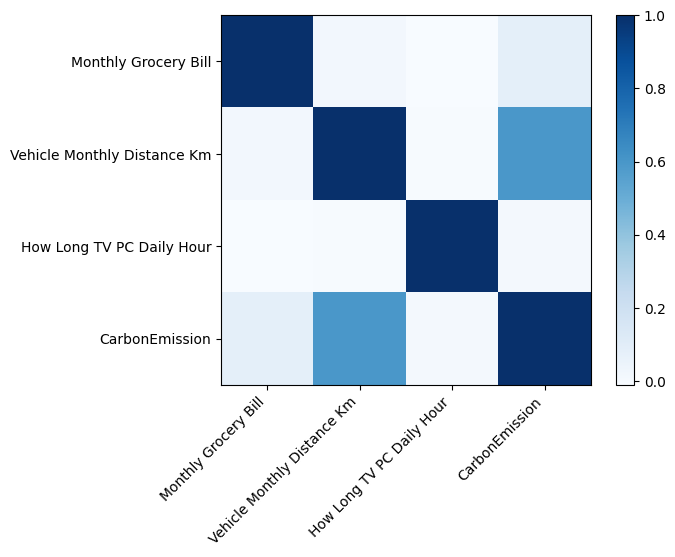

In [125]:
plt.imshow(matrix,cmap='Blues')

plt.xticks(range(4),list(matrix.columns),rotation=45,ha='right')
plt.yticks(range(4),list(matrix.columns))
plt.colorbar()
plt.show()

In [126]:
m2 = df_encoded.corr()
m2

,Monthly Grocery Bill,Vehicle Monthly Distance Km,How Long TV PC Daily Hour,CarbonEmission,Sex_female,Sex_male,Heating Energy Source_coal,Heating Energy Source_electricity,Heating Energy Source_natural gas,Heating Energy Source_wood,...,Vehicle Type_hybrid,Vehicle Type_lpg,Vehicle Type_petrol,Frequency of Traveling by Air_frequently,Frequency of Traveling by Air_never,Frequency of Traveling by Air_rarely,Frequency of Traveling by Air_very frequently,Energy efficiency_No,Energy efficiency_Sometimes,Energy efficiency_Yes
Monthly Grocery Bill,1.000000,0.015801,-0.010318,0.081587,-0.015877,0.015877,-0.008957,-0.008087,0.009231,0.007983,...,-0.003575,0.001419,0.015982,0.010604,0.003620,-0.006545,-0.007671,-0.013576,-0.004198,0.017717
Vehicle Monthly Distance Km,0.015801,1.000000,-0.003943,0.594171,0.006622,-0.006622,0.014508,-0.001630,-0.016752,0.003774,...,0.287796,0.319735,0.286093,-0.008632,-0.014043,0.029698,-0.006945,-0.007406,-0.005873,0.013286
How Long TV PC Daily Hour,-0.010318,-0.003943,1.000000,0.012985,-0.006698,0.006698,-0.012384,0.003446,0.007555,0.001442,...,-0.001169,0.005028,-0.016307,-0.010054,0.011396,-0.002015,0.000758,-0.002962,-0.000061,0.003001
CarbonEmission,0.081587,0.594171,0.012985,1.000000,-0.163895,0.163895,0.128958,-0.132167,-0.011807,0.015543,...,0.113084,0.291281,0.382708,0.053512,-0.310208,-0.182285,0.434243,0.011860,0.000003,-0.011775
Sex_female,-0.015877,0.006622,-0.006698,-0.163895,1.000000,-1.000000,0.014152,0.011108,-0.021227,-0.004282,...,0.011873,0.003151,-0.008092,0.008855,-0.006605,0.001282,-0.003574,0.006097,0.006758,-0.012881
Sex_male,0.015877,-0.006622,0.006698,0.163895,-1.000000,1.000000,-0.014152,-0.011108,0.021227,0.004282,...,-0.011873,-0.003151,0.008092,-0.008855,0.006605,-0.001282,0.003574,-0.006097,-0.006758,0.012881
Heating Energy Source_coal,-0.008957,0.014508,-0.012384,0.128958,0.014152,-0.014152,1.000000,-0.340029,-0.331979,-0.332069,...,-0.004675,0.010079,0.006329,-0.012617,-0.001286,0.000562,0.013307,0.007559,0.002074,-0.009598
Heating Energy Source_electricity,-0.008087,-0.001630,0.003446,-0.132167,0.011108,-0.011108,-0.340029,1.000000,-0.334531,-0.334621,...,0.007638,-0.005291,-0.004769,0.012607,-0.007743,0.001525,-0.006433,0.007363,0.001081,-0.008401
Heating Energy Source_natural gas,0.009231,-0.016752,0.007555,-0.011807,-0.021227,0.021227,-0.331979,-0.334531,1.000000,-0.326700,...,-0.008581,-0.001460,-0.007824,0.005125,0.021344,-0.006365,-0.019916,0.008937,-0.005655,-0.003155
Heating Energy Source_wood,0.007983,0.003774,0.001442,0.015543,-0.004282,0.004282,-0.332069,-0.334621,-0.326700,1.000000,...,0.005563,-0.003346,0.006269,-0.005162,-0.012209,0.004256,0.013009,-0.024006,0.002470,0.021332


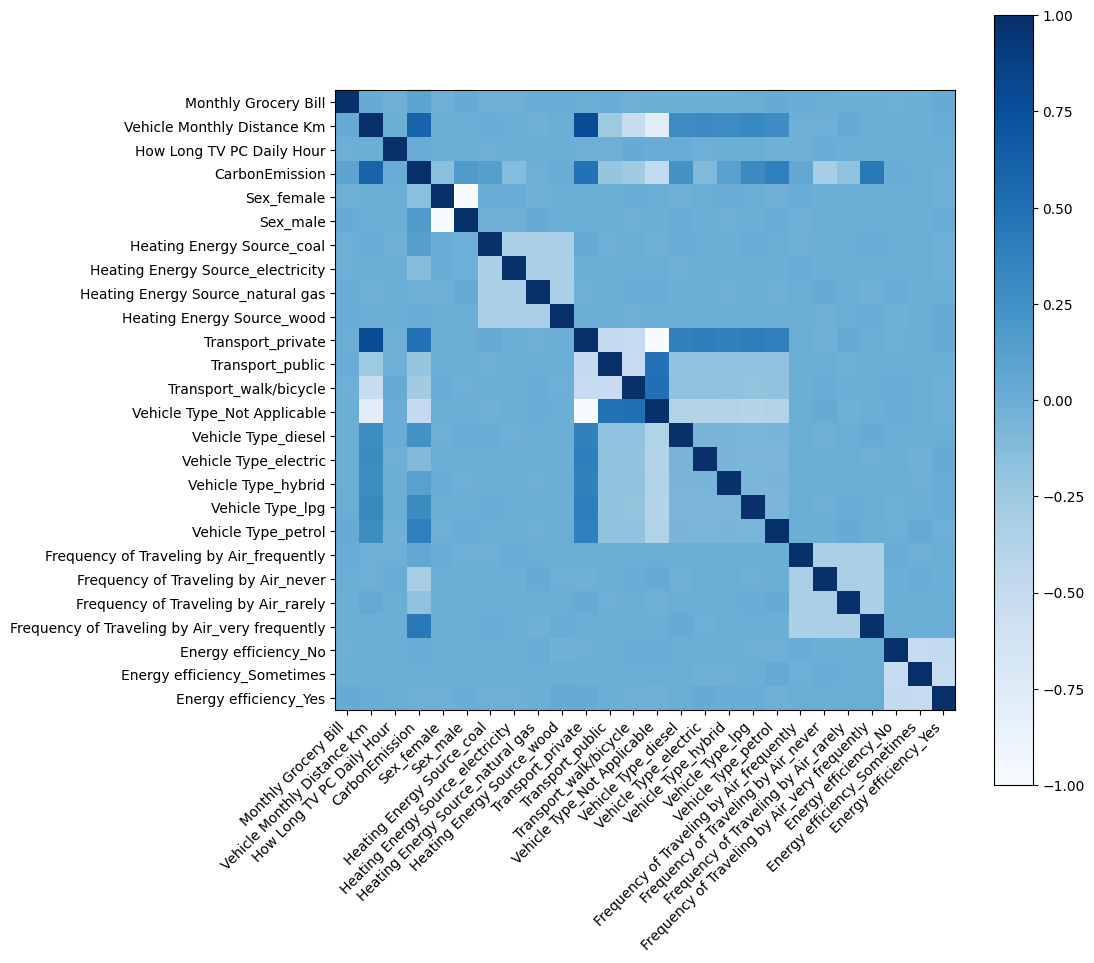

In [127]:
plt.figure(figsize=(10,10))
plt.imshow(m2,cmap='Blues')

plt.xticks(range(26),list(m2.columns),rotation=45,ha='right')
plt.yticks(range(26),list(m2.columns))
plt.colorbar()

plt.show()

### Subplot of Box Plots of Numerical Data

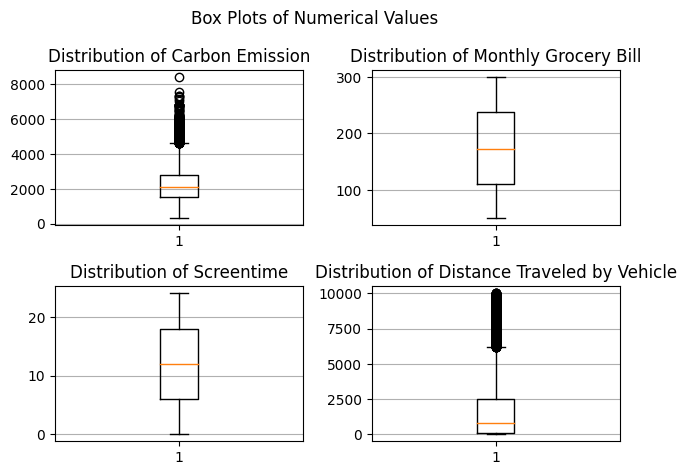

In [128]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].boxplot(df['CarbonEmission'])
ax[0,0].set_title('Distribution of Carbon Emission')
ax[0,0].grid(axis='y')

ax[0,1].boxplot(df['Monthly Grocery Bill'])
ax[0,1].set_title("Distribution of Monthly Grocery Bill")
ax[0,1].grid(axis='y')

ax[1,0].boxplot(df['How Long TV PC Daily Hour'])
ax[1,0].set_title("Distribution of Screentime")
ax[1,0].grid(axis='y')

ax[1,1].boxplot(df['Vehicle Monthly Distance Km'])
ax[1,1].set_title("Distribution of Distance Traveled by Vehicle")
ax[1,1].grid(axis='y')

fig.suptitle('Box Plots of Numerical Values')
fig.tight_layout()
plt.show()

### Suplots of Pie Charts of Categorical Data

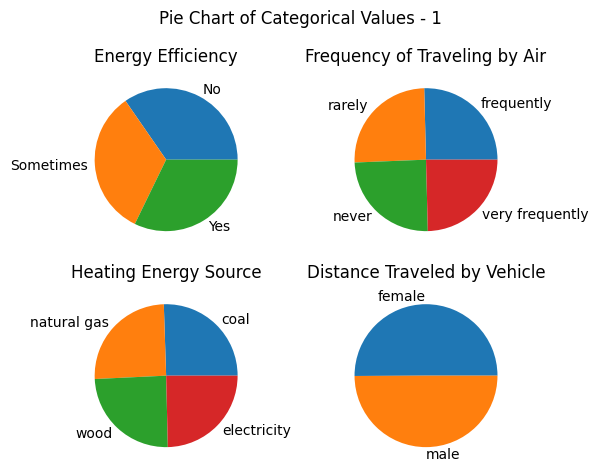

In [129]:
fig, ax2 = plt.subplots(nrows=2,ncols=2)
ax2[0,0].pie(df['Energy efficiency'].value_counts(),labels=df['Energy efficiency'].unique())
ax2[0,0].set_title('Energy Efficiency')

ax2[0,1].pie(df['Frequency of Traveling by Air'].value_counts(),labels=df['Frequency of Traveling by Air'].unique())
ax2[0,1].set_title("Frequency of Traveling by Air")

ax2[1,0].pie(df['Heating Energy Source'].value_counts(),labels=df['Heating Energy Source'].unique())
ax2[1,0].set_title("Heating Energy Source")

ax2[1,1].pie(df['Sex'].value_counts(),labels=df['Sex'].unique())
ax2[1,1].set_title("Distance Traveled by Vehicle")

fig.suptitle('Pie Chart of Categorical Values - 1')
fig.tight_layout()
plt.show()

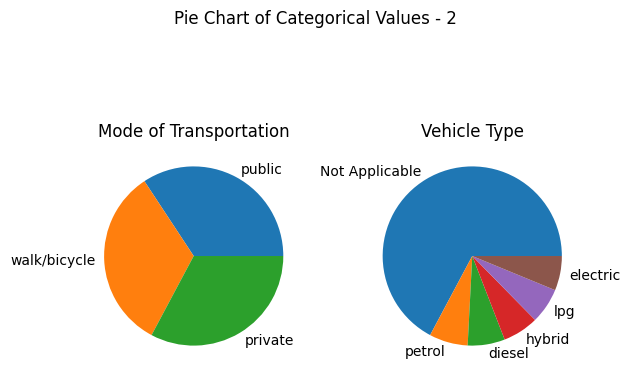

In [130]:
fig, ax3 = plt.subplots(nrows=1,ncols=2)
ax3[0].pie(df['Transport'].value_counts(),labels=df['Transport'].unique())
ax3[0].set_title('Mode of Transportation')

ax3[1].pie(df['Vehicle Type'].value_counts(),labels=df['Vehicle Type'].unique())
ax3[1].set_title("Vehicle Type")

fig.suptitle('Pie Chart of Categorical Values - 2')
fig.tight_layout()
plt.show()

## Conclusion

Upon examination of the given dataset little correlation was found between the variables Carbon Emission and Energy Efficiency. The data for the variable Energy Efficiency was based on respondents views on purchasing energy efficient devices. It is likely that the effect of Energy Efficiency on Carbon Emission was not significant since respondents provided their views and not necessarily what they practice.
There was also noteable positive correlations between Carbon Emission and Vehicle Monthly Distance and Carbon Emission and Traveling by Air Frequently.